# 3. DBSCAN 

# 3.0 Introduccion

Uno de los algoritmos de clustering poco conocidos es DBSCAN , un algoritmo de agrupamiento basado en la densidad, que modela los clústers como cúmulos de alta densidad de puntos. ***Por lo cual, si un punto pertenece o no a un clúster, debe estar cerca de un montón de otros puntos de dicho clúster de datos***. DBSCAN es muy util para poder detectar ***outliers*** (valores atípicos). El DBSCAN necesita de dos parametros , número épsilon (***eps***) y un número minPoints (***min_samples***).

**Eps**: El numero epsilon es el radio que tendra las vecindades.

**Min_sample**: Es el numero minimo de puntos dentro de una vecindad.


 


***Explicacion del algoritmo:***

Se elige de inicio un punto arbitrario en el conjunto de datos. Si hay una cantidad de puntos mayor o igual a minPoints a una distancia épsilon del punto arbitrario, ***a partir de ese momento se consideran todos los puntos como parte de un clúster***. A continuación, se expande ese grupo mediante la comprobación de todos los nuevos puntos y ver si ellos también tienen más puntos minPoints a una distancia épsilon, creciendo el clúster de forma recursiva en caso afirmativo.

Si el punto arbitrario escogido tiene menos de minPoints puntos en su círculo de radio épsilon, y tampoco es parte de cualquier otra agrupación, entonces, se considera un “***punto de ruido***” que no pertenecen a ningún grupo.

# 3.1 Ejemplos

## 3.1.0 Numpy

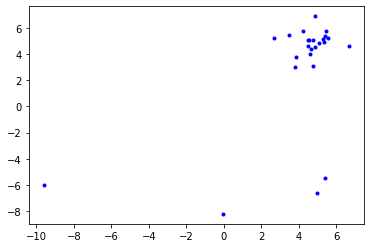

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Creacion de cluster
c1 = np.random.randn(20, 2) + 5

# Creacion de data con ruido , distribuido en todo el espacio
np.random.seed(10)
u1 = np.random.uniform(low=-10, high=10, size=5)
u2 = np.random.uniform(low=-10, high=10, size=5)
c2 = np.column_stack([u1, u2])

# Integracion de los tres cluster 150 x 2
data = np.vstack([c1, c2])

x_data=[]
y_data=[]
for i in np.arange(data.shape[0]):
    x_data.append(data[i][0])
    y_data.append(data[i][1])



plt.plot(x_data,y_data,'b.')


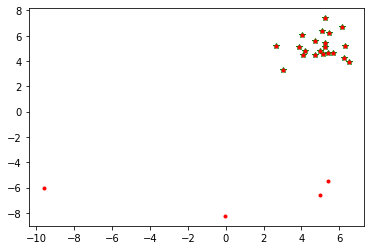

In [11]:
# variar el eps
eps=3
min_puntos=4

Numero_datos=len(x_data)

puntos_x=[]
puntos_y=[]
cont=0
for i in np.arange(Numero_datos):
  for j in np.arange(Numero_datos):
    dist=pow( (x_data[i]-x_data[j])**2+(y_data[i]-y_data[j])**2 , 0.5 )
    if ( dist < eps ):
      cont=cont+1
  if ( cont > min_puntos ):
    puntos_x.append(x_data[i])
    puntos_y.append(y_data[i])
  cont=0

plt.plot(puntos_x,puntos_y,'g*')
plt.plot(x_data,y_data,'r.')

## 3.1.1 Sklearn

In [0]:
#DBSCAN

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.cluster import DBSCAN

# Creacion de cluster
np.random.seed(10)
c1 = np.random.randn(50, 2) + 5
c2 = np.random.randn(50, 2)

# Creacion de data con ruido , distribuido en todo el espacio
u1 = np.random.uniform(low=-10, high=10, size=10)
u2 = np.random.uniform(low=-10, high=10, size=10)
c3 = np.column_stack([u1, u2])

# Integracion de los tres cluster 110 x 2
data = np.vstack([c1, c2, c3])

[ 0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  0 -1  0  0  0
  0 -1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1]


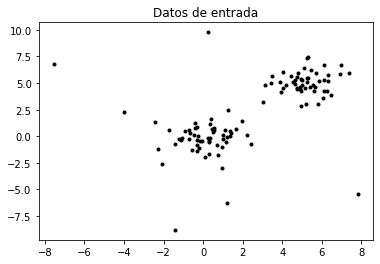

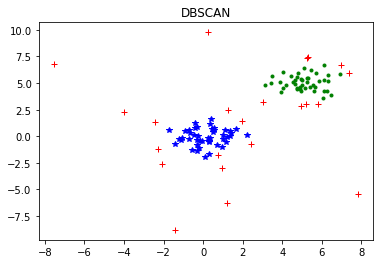

In [13]:
# Calculo de los cluster con DBSCAN
db = DBSCAN(eps=0.95, min_samples=10).fit(data)
labels = db.labels_
print(labels)

# Retrieving coordinates for points in each
# identified core. There are two clusters
# denoted as 0 and 1 and the noise is denoted
# as -1. Here we split the data based on which
# component they belong to.
dbc1 = data[labels == 0]
dbc2 = data[labels == 1]
noise = data[labels == -1]
# Setting up plot details

plt.figure(1)
plt.title('Datos de entrada')
plt.plot(c1[:,0], c1[:,1],'k.')
plt.plot(c2[:,0], c2[:,1],'k.')
plt.plot(c3[:,0], c3[:,1],'k.')

plt.figure(2)
plt.title('DBSCAN')
plt.plot(dbc1[:,0], dbc1[:,1],'g.')
plt.plot(dbc2[:,0], dbc2[:,1],'b*')
plt.plot(noise[:,0], noise[:,1],'r+')

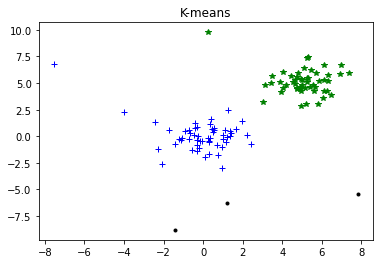

In [0]:
# K-means

from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit(data)
labels = k_means.predict(data)

c1 = data[labels == 0]
c2 = data[labels == 1]
c3 = data[labels == 2]

plt.figure(1)
plt.title('K-means')
plt.plot(c1[:,0], c1[:,1],'k.')
plt.plot(c2[:,0], c2[:,1],'g*')
plt.plot(c3[:,0], c3[:,1],'b+')


## 3.1.2 Funcion de costo ( 3 puntos - 20 min )

la funcion de coste se calcula como las suma de las distancias de los puntos del cluster a su respectivo centroide.

Hacer el calculo de la funcion de coste para el ejemplo anterior (DBSCAN y K-means).

\begin{equation}
J={\sum_{j=1}^k}||(x_1,x_2,...,x_n) - (u_{1j},u_{2j},...,u_{nj})||
\end{equation}

# 3.2 Tarea 6

Una de las aplicaciones mas notables del DBSCAN , es la eliminacion de ***outliers***. Implementar el siguiente modelo:

***Situacion 1:***

*   Generar data con el comportaminto $5x^2+2x+1$ + ruido
*   Modelo a usar regresion polinomial simple
*   Optimizacion por gradiente descendente
*   Evaluar la regresion con $R^2$


***Situacion 2:***

*   Generar data con el comportaminto $5x^2+2x+1$ + ruido
*   Aplicar DBSCAN para eliminar los outliers
*   Modelo a usar regresion polinomial simple
*   Optimizacion por gradiente descendente
*   Evaluar la regresion con $R^2$


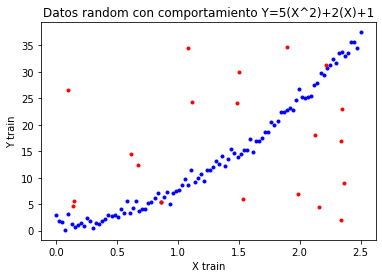

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform,random

# Creación de data de entrenamiento
n_datos=100
X_train = np.linspace(0, 2.5, n_datos)
y_train = 1 +2 * X_train +5*(pow(X_train,2)) + np.random.randn(1,n_datos)[0] * 0.9
c1=np.column_stack([X_train,y_train])

u1 = np.random.uniform(low=0, high=2.5, size=20)
u2 = np.random.uniform(low=0, high=35, size=20)
ruido = np.column_stack([u1, u2])

plt.title('Datos random con comportamiento Y=5(X^2)+2(X)+1')
plt.xlabel('X train')
plt.ylabel('Y train')
plt.plot(c1[:,0],c1[:,1],'b.')
plt.plot(ruido[:,0],ruido[:,1],'r.')